# Understanding Models 
Understanding how different kind of models and how they dehave differently on data

Quick acess :
- [Loading Data Sets](#loading-datasets)
- [Analyzing Data](#analyzing-data-sets)
  - [Analyzing Anagrams Data Set](#analyzing-anagrams-dataset)
  - [Analyzing Anscombe Data Set](#analyzing-anscombe-dataset)
  - [Analyzing Dots Data Set](#analyzing-dots-dataset)
- [Linear Regression](#linear-regression)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## use display for html output
from IPython.display import display, HTML

# auto-reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
#dark theme
sns.set_style("dark")
plt.style.use("dark_background")

### Loading Datasets

In [38]:
names = sns.get_dataset_names()
subList = [names[n:n+5] for n in range(0, len(names), 5)]
display(pd.DataFrame(subList))
del names, subList

,0,1,2,3,4
0,anagrams,anscombe,attention,brain_networks,car_crashes
1,diamonds,dots,exercise,flights,fmri
2,gammas,geyser,iris,mpg,penguins
3,planets,taxis,tips,titanic,None


In [39]:
# load data from seaborn
data_sets = sns.get_dataset_names()
df_set = {}
for i in data_sets:
    df = sns.load_dataset(i)
    df_set[i] = df
    print(i, df.shape)
    display(df.head())

del i, data_sets, df
    

anagrams (20, 5)


,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8


anscombe (44, 3)


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


attention (60, 5)


,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


brain_networks (923, 63)


,network,1,1.1,2,2.1,3,3.1,4,4.1,5,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
0,node,1,1,1,1,1,1,1,1,1,...,3,4,4,1,1,2,2,3,3,4
1,hemi,lh,rh,lh,rh,lh,rh,lh,rh,lh,...,rh,lh,rh,lh,rh,lh,rh,lh,rh,lh
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,56.05574417114258,92.03103637695312,3.391575574874878,38.65968322753906,26.203819274902344,-49.71556854248047,47.4610366821289,26.746612548828125,-35.898860931396484,...,0.6079040169715881,-70.27054595947266,77.36577606201172,-21.73455047607422,1.0282527208328247,7.7917842864990225,68.90372467041016,-10.520872116088867,120.49046325683594,-39.686431884765625
4,1,55.5472526550293,43.6900749206543,-65.49598693847656,-13.974522590637207,-28.27496337890625,-39.05012893676758,-1.2106596231460571,-19.012897491455078,19.568010330200195,...,57.49507141113281,-76.39321899414062,127.26136016845705,-13.035799026489258,46.3818244934082,-15.752449989318848,31.00033187866211,-39.607521057128906,24.76401138305664,-36.7710075378418


car_crashes (51, 8)


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


diamonds (53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


dots (848, 5)


,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


exercise (90, 6)


,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


flights (144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


fmri (1064, 5)


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


gammas (6000, 4)


,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433
1,0.0,IPS,1,-0.414368
2,0.0,IPS,2,0.214695
3,0.0,IPS,3,0.814809
4,0.0,IPS,4,-0.894992


geyser (272, 3)


,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


iris (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


mpg (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


penguins (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


planets (1035, 6)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


taxis (6433, 14)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


tips (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


titanic (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---

### Analyzing Data sets

#### Analyzing anagrams dataset

In [40]:
from utils import analyze_cols
analyze_cols(df_set["anagrams"], no_cols=3)

subidr,attnr,num1,num2,num3


,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8


In [41]:
colus = df_set.get("anagrams")['subidr']
from utils import display_cols
display_cols(colus, no_cols=10)
del colus

1,2,3,4,5,6,7,8,9,10
11,12,13,14,15,16,17,18,19,20


As we can clearly observe subidr just is the index of the entire data frame therefore we can clearly remove it as it doesn't hold any important information.

In [42]:
df_set.get("anagrams").drop(columns=['subidr'], inplace=True)
df_set.get('anagrams').head()

,attnr,num1,num2,num3
0,divided,2,4.0,7
1,divided,3,4.0,5
2,divided,3,5.0,6
3,divided,5,7.0,5
4,divided,4,5.0,8


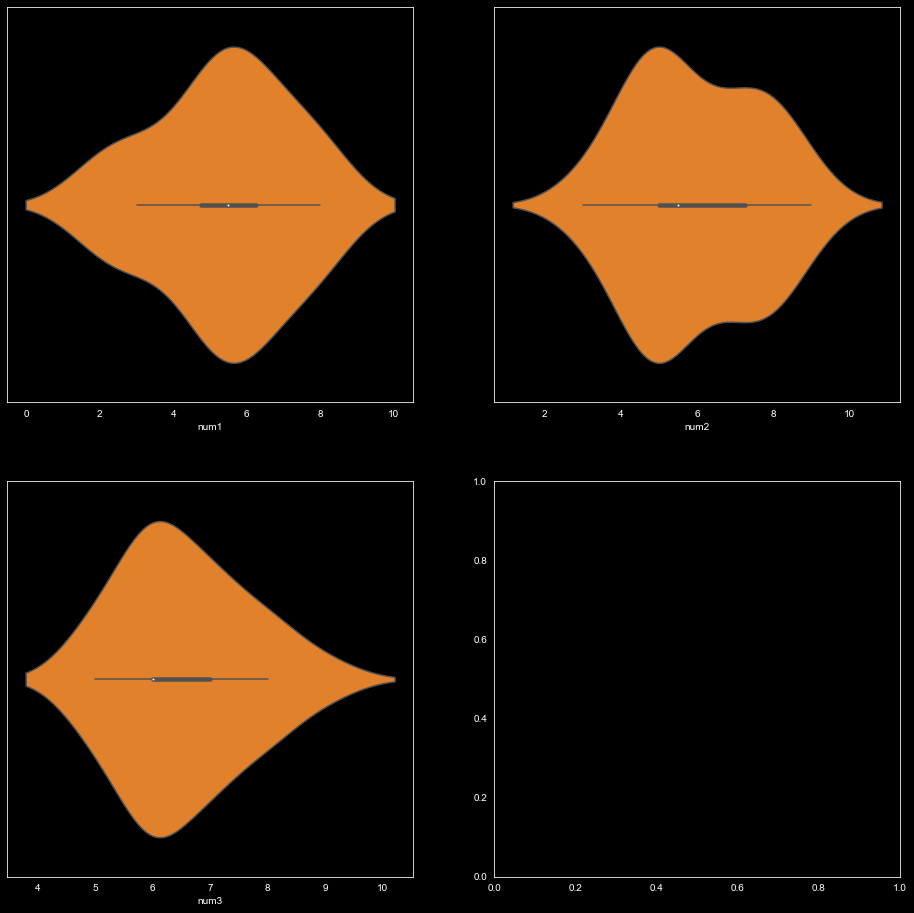

In [43]:
features = "num1 num2 num3".split()
fig, ax = plt.subplots( nrows=2, ncols=2, figsize=(16,16))
for idx, label in enumerate(features):
    sns.violinplot(x=label, 
    data=df_set["anagrams"], ax=ax[idx//2][idx%2],
    palette=["#ff7f0e"])

del features, fig, ax

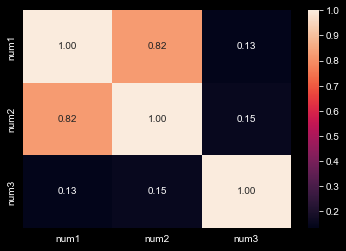

In [44]:
cm = df_set.get('anagrams').corr()
sns.heatmap(cm, annot=True, fmt='.2f')

del cm

From this heat map we can see that the num1 and num2 are the ones that have the most correlation with the each other so they can be removed.

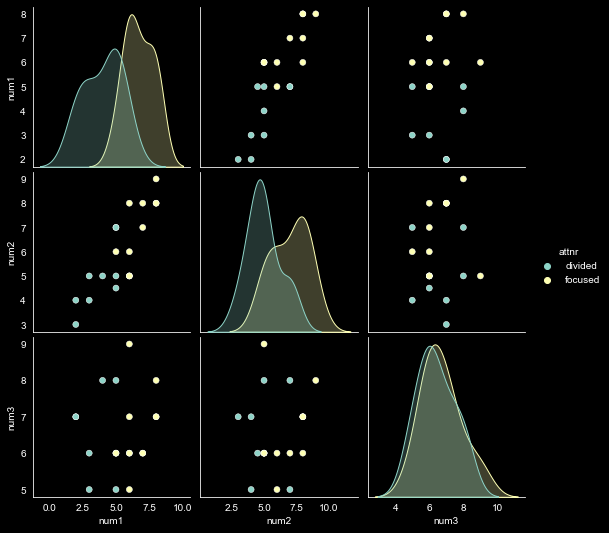

In [50]:
sns.pairplot(df_set.get('anagrams'), hue='attnr')

Features: num1, num3

Dependent variable: attnr

<AxesSubplot:xlabel='num1', ylabel='num3'>

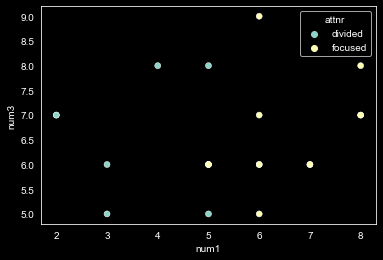

In [53]:
sns.scatterplot(x='num1', y='num3',hue='attnr', data=df_set.get('anagrams'))

Visually we can distinguish the two classes of data are forming some kind of clusters.

---

#### Analyzing anscombe dataset

In [61]:
from utils import analyze_cols
analyze_cols(df_set.get('anscombe'))

dataset,x,y,,


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


8.84,2
8.04,1
5.73,1
12.74,1
7.11,1


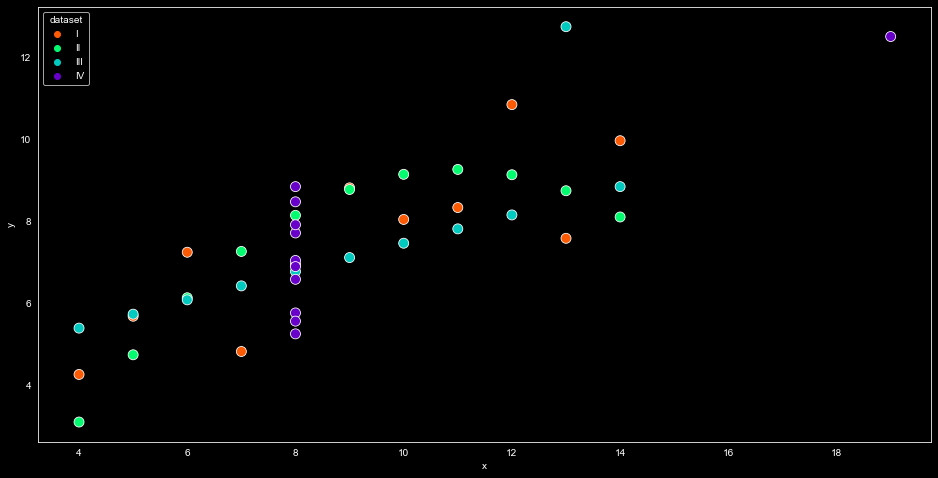

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
sns.scatterplot(x='x', y='y',hue='dataset',
    data=df_set.get('anscombe'), ax = ax,
    palette=['#fc5a03', '#03fc6f', '#00c9bf', '#6800c9'], s=100)

del fig, ax

This is a really challanging data set as there isn't a clear way to differentiate between the classes. From the plot alone we are able to see that the data is not normally distributed. Let's see if any columns are corelated with each other.

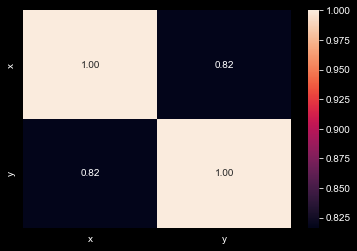

In [77]:
cm = df_set.get('anscombe').corr()
sns.heatmap(cm, annot=True, fmt='.2f')

del cm

It seems that y is highly co-reated with x. Let's see if we can use this to predict the data.

<AxesSubplot:xlabel='x'>

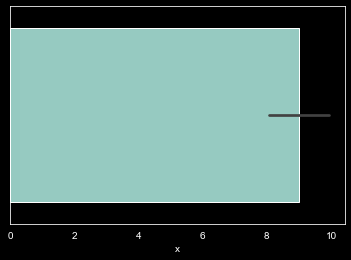

In [82]:
sns.barplot(x='x', hue='dataset', data=df_set.get('anscombe'))

#### Analyzing attention dataset

In [76]:
from utils import analyze_cols
analyze_cols(df_set.get('attention'), no_cols=3)

Unnamed: 0,subject,attention,solutions,score


,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


#### Analyzing dots dataset

In [46]:
from utils import analyze_cols
analyze_cols(df_set['dots'], no_cols=3, features_no_cols=3)

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


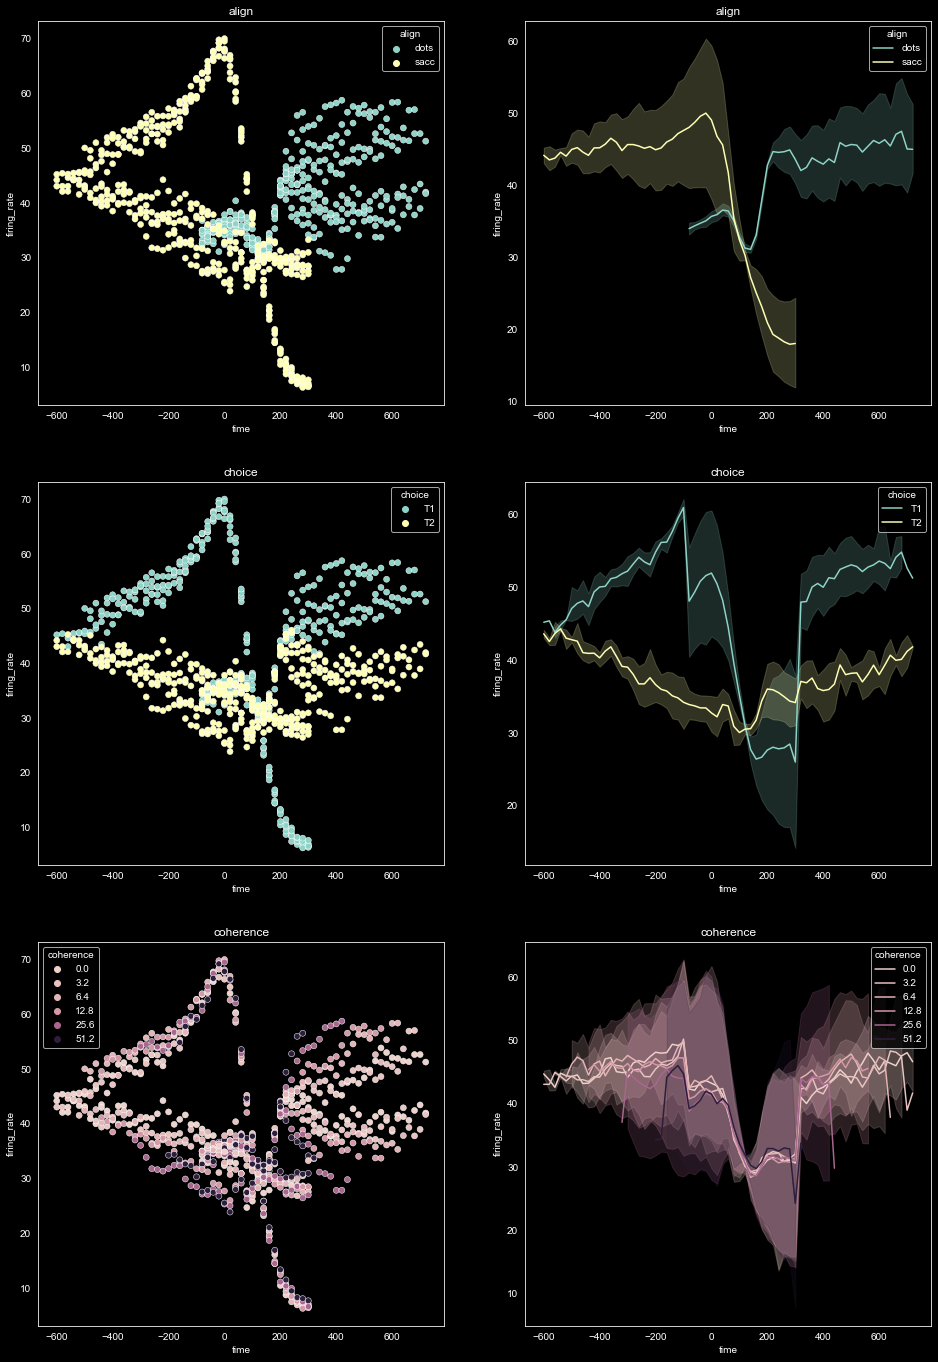

In [47]:
cols = ["align", "choice", "coherence"]
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(16, 8*len(cols)))

for idx, col_label in enumerate(cols):
    sns.scatterplot(x="time", y="firing_rate", hue=col_label, data=df_set["dots"], ax=ax[idx][0])
    sns.lineplot(x="time", y="firing_rate", hue=col_label, data=df_set["dots"], ax=ax[idx][1])
    ax[idx][0].set_title(col_label)
    ax[idx][1].set_title(col_label)

del fig, ax

**Obsevation:**

 From the above graphs we can observe that there is some kind of relationship between the two choice firing rate and other features.
They form a kind of clusters therefore we can try to use clustering techniques to group them.

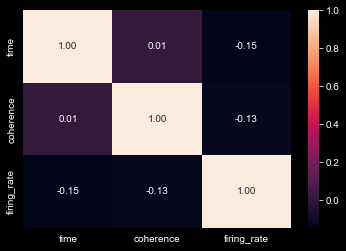

In [48]:
cm = df_set.get('dots').corr()
sns.heatmap(cm, annot=True, fmt='.2f')

del cm

---

## Linear Regression